<a href="https://colab.research.google.com/github/kuntal2022/Deep-Learning-/blob/main/CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cat and Dog Classifier**

In [1]:
import warnings as war
war.filterwarnings( 'ignore')

In [21]:
# importing all modules

import pandas as pd, numpy as np, sklearn, matplotlib.pyplot as plt, seaborn as sns, tensorflow as tf
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder,\
OrdinalEncoder, FunctionTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import cv2






In [5]:
# making kegal friendly enviroment
# dataset "https://www.kaggle.com/datasets/salader/dogs-vs-cats"

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
# getting the kegal toke after creating it from kegal--> profile--> account-->create token

! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 190MB/s]
100% 1.06G/1.06G [00:07<00:00, 162MB/s]


In [7]:
## unfolding the zip file

import zipfile

zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:

# converting the train and test images to 256,256 pixel

train_ds=tf.keras.utils.image_dataset_from_directory(
    directory= '/content/train', # the path
    labels='inferred',
    # cat will be 0 as and dog will be 1 depending on the order of sub folders in main folder
    label_mode='int',
    image_size=(256,256), # resizing
    batch_size=32

)

Found 20000 files belonging to 2 classes.


In [12]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels='inferred',
    label_mode='int',
    image_size=(256,256),
    batch_size=32
)

Found 5000 files belonging to 2 classes.


In [13]:
# creating function to devide each images by 256 to get range from 0 to 1
def process(image, labels):
  image = tf.cast(image, tf.float32)
  return image, labels

In [14]:
#mapping all the array with process function
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [19]:
# creation of the CNN model

model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation ='relu', input_shape=(256,256,3), padding='valid'))
# 32 filters of 3,3, input shape in 3 dimension (row, row, col), padding is same means 0 padding applied
model.add(BatchNormalization())
# batch normalization is added to normalized all the output
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), activation ='relu',  padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), activation ='relu',  padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


#faltten the layers
model.add(Flatten())

#Fully connected layers
model.add(Dense(128, activation='relu' ))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
# output layer
model.add(Dense(1, activation='sigmoid'))

# compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# define the early stopping
er= EarlyStopping(monitor='val_loss', patience=10, min_delta=.5)

# fit the model
history = model.fit(train_ds, epochs=100, validation_data=test_ds, callbacks=er, )



Epoch 1/100
625/625 [==============================] - 23s 31ms/step - loss: 0.5740 - accuracy: 0.7000 - val_loss: 0.5828 - val_accuracy: 0.6906
Epoch 2/100
625/625 [==============================] - 19s 30ms/step - loss: 0.4369 - accuracy: 0.7964 - val_loss: 0.4713 - val_accuracy: 0.7810
Epoch 3/100
625/625 [==============================] - 19s 30ms/step - loss: 0.3425 - accuracy: 0.8499 - val_loss: 0.5160 - val_accuracy: 0.7484
Epoch 4/100
625/625 [==============================] - 19s 30ms/step - loss: 0.2501 - accuracy: 0.8967 - val_loss: 0.4779 - val_accuracy: 0.8094
Epoch 5/100
625/625 [==============================] - 19s 30ms/step - loss: 0.1596 - accuracy: 0.9359 - val_loss: 0.5444 - val_accuracy: 0.8054
Epoch 6/100
625/625 [==============================] - 19s 30ms/step - loss: 0.1191 - accuracy: 0.9556 - val_loss: 0.5103 - val_accuracy: 0.8208
Epoch 7/100
625/625 [==============================] - 19s 30ms/step - loss: 0.0886 - accuracy: 0.9659 - val_loss: 0.5981 - val_ac

In [16]:
# get the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

Text(0.5, 0, 'epoch')

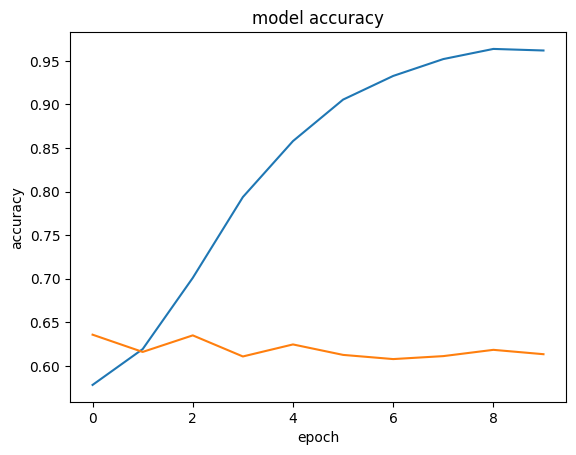

In [17]:
# ploted old overfitted model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

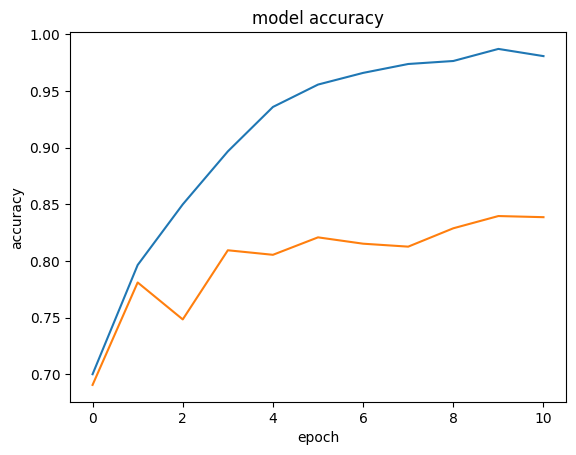

In [20]:
#ploted new genralised model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [67]:
# creation of the function to predict the picture

def predict(image_path):
  image= cv2.imread(image_path)
  plt.imshow( image)
  image= cv2.resize(image, (256,256))
  image=image.reshape(1,256,256,3)
  out_put= model.predict(image)


  if out_put<=0.55:
    return 'Cat',
  else:
    return 'Dog'


1/1 [==============================] - 0s 23ms/step


('Cat',)

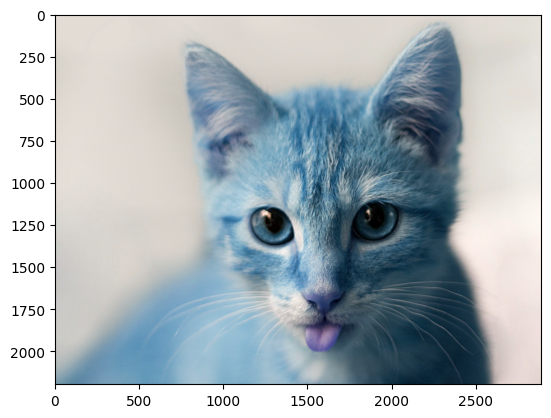

In [69]:
# prediction of a cat new pic
predict("/content/cat.jpeg")

1/1 [==============================] - 0s 24ms/step


'Dog'

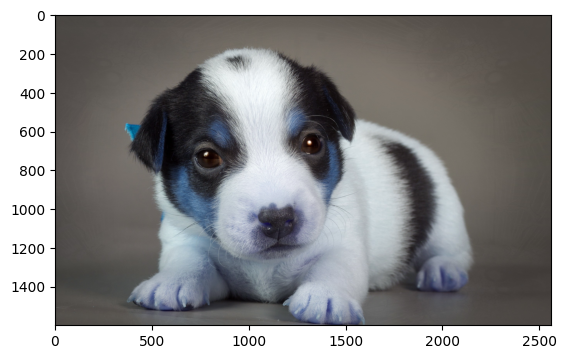

In [70]:
# prediction of a dog new pic
predict("/content/dog3.jpg")